In [4]:
import warnings
warnings.filterwarnings('ignore')

import iris
import numpy
import matplotlib.pyplot as plt
import glob

In [42]:
vol_file = '/g/data/r87/dbi599/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Omon/volo/gn/v20190429/volo-tsdist_Omon_CanESM5_historical_r1i1p1f1_gn_2005-2014-monthly-clim.nc'
vol_cube = iris.load_cube(vol_file)
print(vol_cube.summary(shorten=True))

ocean_volume / (m3)                 (sea_water_salinity: 300; sea_water_potential_temperature: 176; region: 7)


In [7]:
wm_files = glob.glob('/g/data/r87/dbi599/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Omon/water-mass/gn/v20190429/water-mass_Omon_CanESM5_historical_r1i1p1f1_gn_*.nc')
wm_files.sort()

In [10]:
vcube = iris.load_cube(wm_files[-1], 'ocean_volume')
print(vcube.summary(shorten=True))

ocean_volume / (m3)                 (year: 4; sea_water_potential_temperature: 44; region: 7)


In [12]:
vscube = iris.load_cube(wm_files[-1], "Sea Water Salinity times Ocean Grid-Cell Volume")
print(vscube.summary(shorten=True))

Sea Water Salinity times Ocean Grid-Cell Volume / (g/kg m3) (year: 4; sea_water_potential_temperature: 44; region: 7)


In [13]:
so_profiles = vscube / vcube
print(so_profiles.summary(shorten=True))

unknown / (0.001 1)                 (year: 4; sea_water_potential_temperature: 44; region: 7)


In [23]:
def plot_basin(vol_cube, salinity_cube, basin_name):
    """Plot at volume distribution."""
    
    x_values = vol_cube.coord('sea_water_salinity').points
    y_values = vol_cube.coord('sea_water_potential_temperature').points
    extents = [x_values[0], x_values[-1], y_values[0], y_values[-1]]
    
    basin_dict = {'north_atlantic': 0, 'south_atlantic': 1,
                  'north_pacific': 2, 'south_pacific': 3,
                  'indian': 4, 'arctic': 5, 'marginal_seas_and_land': 6} 

    log_hist = numpy.log(vol_cube.data[:, :, basin_dict[basin_name]]).T
    
    plt.figure(figsize=(9, 8))
    plt.imshow(log_hist, origin='lower', extent=extents, aspect='auto', cmap='hot_r')
    cb = plt.colorbar()
    cb.set_label('log(volume), $m^3 (^\circ C \; g/kg)^{-1}$')

    sprofile = salinity_cube.data[-1, :, basin_dict[basin_name]]
    plt.plot(sprofile, salinity_cube.coord('sea_water_potential_temperature').points)
    
    plt.xlim(x_values[0], x_values[-1])
    plt.title(basin_name)
    plt.xlabel('salinity (g/kg)')
    plt.ylabel('temperature (C)')
    plt.show()

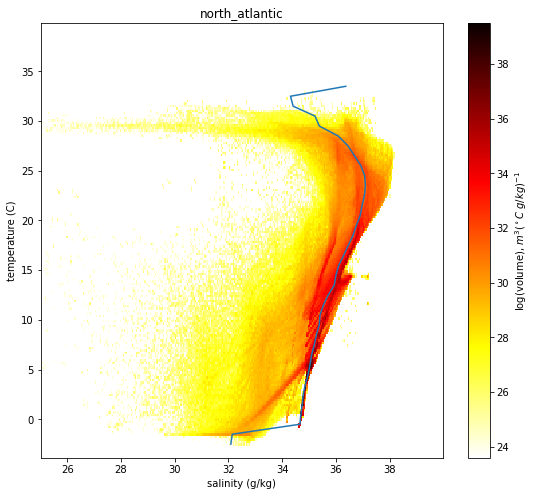

In [43]:
plot_basin(vol_cube, so_profiles, 'north_atlantic')

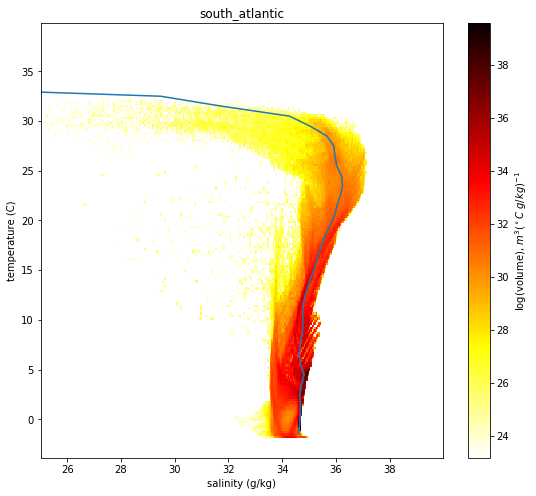

In [44]:
plot_basin(vol_cube, so_profiles, 'south_atlantic')

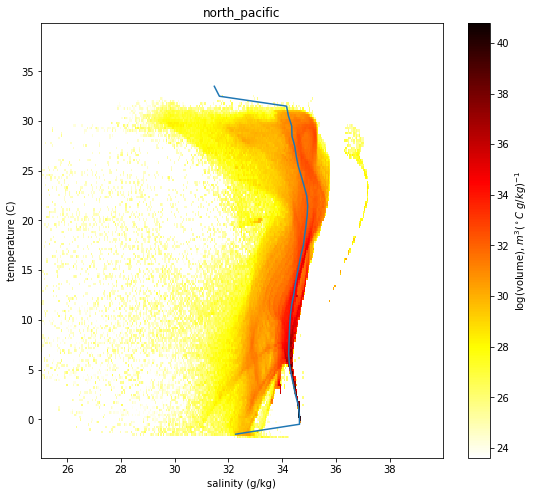

In [45]:
plot_basin(vol_cube, so_profiles, 'north_pacific')

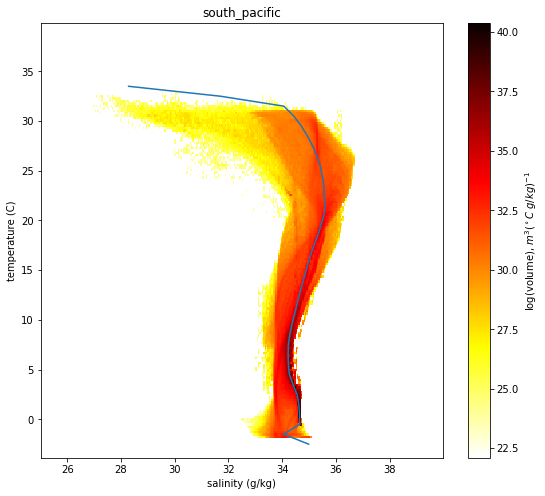

In [46]:
plot_basin(vol_cube, so_profiles, 'south_pacific')

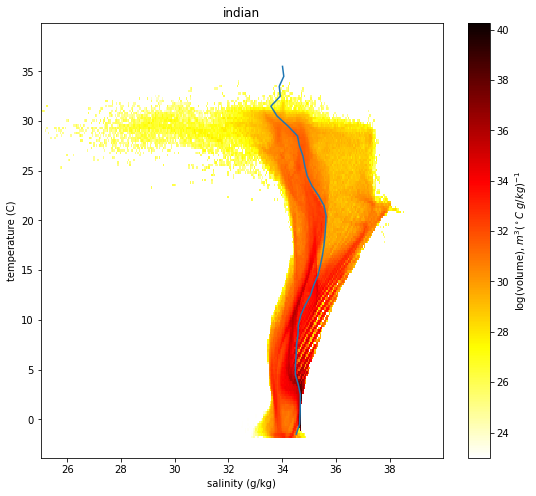

In [47]:
plot_basin(vol_cube, so_profiles, 'indian')

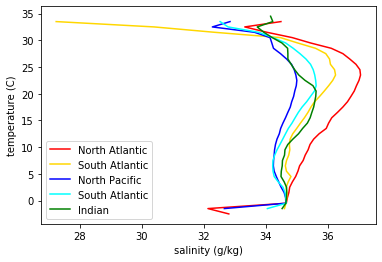

In [29]:
plt.plot(so_profiles.data[0, :, 0], so_profiles.coord('sea_water_potential_temperature').points,
         color='red', label='North Atlantic')
plt.plot(so_profiles.data[0, :, 1], so_profiles.coord('sea_water_potential_temperature').points,
         color='gold', label='South Atlantic')
plt.plot(so_profiles.data[0, :, 2], so_profiles.coord('sea_water_potential_temperature').points,
         color='blue', label='North Pacific')
plt.plot(so_profiles.data[0, :, 3], so_profiles.coord('sea_water_potential_temperature').points,
         color='cyan', label='South Atlantic')
plt.plot(so_profiles.data[0, :, 4], so_profiles.coord('sea_water_potential_temperature').points,
         color='green', label='Indian')
plt.xlabel('salinity (g/kg)')
plt.ylabel('temperature (C)')
plt.legend()
plt.show()